In [1]:
from __future__ import print_function

import pandas as pd
import scipy as sp

from abtools.bayesian import ARPPUModel

%matplotlib inline

In [2]:
mu = 9
size = 300
delta_true = .05

arppu_a = pd.Series(sp.stats.wald.rvs(loc=mu, size=size, random_state=8228))
arppu_b = pd.Series(sp.stats.wald.rvs(loc=mu*(1+delta_true), size=size, random_state=8228))

print('ARPPU')
print('Mean: %.4f' % arppu_a.mean())
print('Mean: %.4f' % arppu_b.mean())
print('B больше A на %.4f = %d%%' % (arppu_b.mean()- arppu_a.mean(), 
                                    (arppu_b.mean()/arppu_a.mean()-1)*100))

ARPPU
Mean: 9.9796
Mean: 10.4296
B больше A на 0.4500 = 4%


In [3]:
model = ARPPUModel(arppu_a, arppu_b)

In [4]:
model.fit(samples=10000, n_init=2500)

Average ELBO = -4,408.1: 100%|██████████| 2500/2500 [00:00<00:00, 9301.20it/s]
Finished [100%]: Average ELBO = -4,386.4
100%|██████████| 10000/10000 [00:04<00:00, 2227.41it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fccc3c93be0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fccc2c5afd0>], dtype=object)

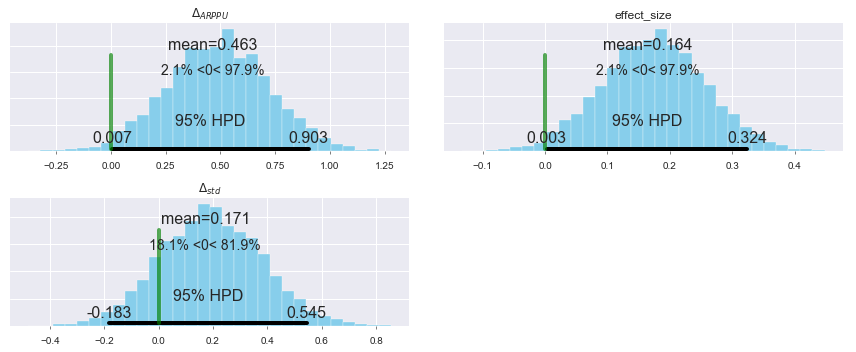

In [5]:
model.plot_deltas(1000)